<a href="https://colab.research.google.com/github/vik-ahlawat/Data_Science-/blob/main/Lecture_6_Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CME 193 - Lec 6: SciPy



What we have seen so far
- Basic python language features
- NumPy and Pandas

Scipy is a collection of packages that provide useful algorithms commonly used for scientific computing.

List of subpackages (We will focus on the highlight ones)
- cluster : Clustering algorithms
- constants : Physical and mathematical constants
- fftpack : Fast Fourier Transform routines
- **integrate** : Integration and ordinary differential equation solvers
- **interpolate** : Interpolation and smoothing splines
- io : Input and Output
- ndimage : N-dimensional image processing
- odr : Orthogonal distance regression
- **optimize** : Optimization and root-finding routines
- signal : Signal processing
- sparse : Sparse matrices and associated routines
- spatial : Spatial data structures and algorithms
- special : Special functions
- **stats** : Statistical distributions and functions

We cannot cover all of them in detail but we will go through some of the packages and their capabilities today

- interpolate
- optimize
- stats
- integrate

We will also briefly look at some other useful packages
- networkx
- sympy

In [ ]:
import numpy as np
# https://scipy-lectures.org/intro/
from numpy import linalg as la
import matplotlib.pyplot as plt

In [ ]:
import scipy
scipy.__version__

'1.15.2'

## Interpolation : `scipy.interpolate`

In [ ]:
import scipy.interpolate as interp
# Estimation of finding new data outputs based on existing data points

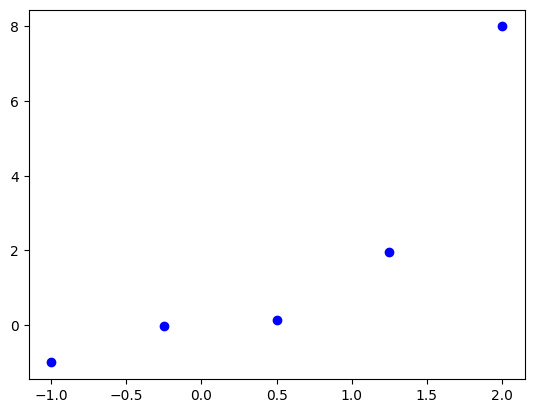

In [ ]:
x = np.linspace(-1, 2, 5)
y = x**3
plt.plot(x, y, "bo")

In [ ]:
f = interp.interp1d(x, y, kind="linear")

In [ ]:
?interp.interp1d

In [ ]:
f(1)

array(1.34375)

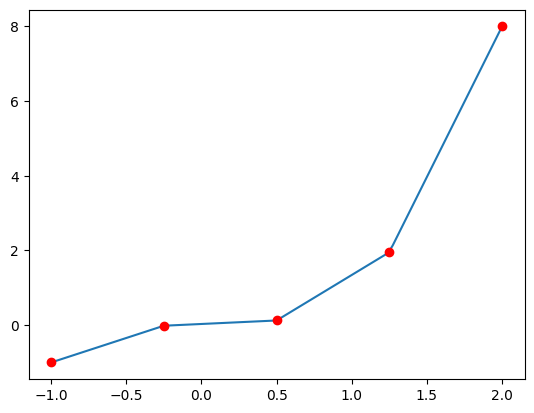

In [ ]:
x_fine = np.linspace(-1, 2, 100)
plt.plot(x_fine, f(x_fine))

plt.plot(x, y, "ro")

In [ ]:
f(3)

ValueError: A value (3.0) in x_new is above the interpolation range's maximum value (2.0).

In [ ]:
f = interp.interp1d(x, y, kind="linear", fill_value="extrapolate")
# estimate the linear step-wise functions

In [ ]:
f(3)

array(16.0625)

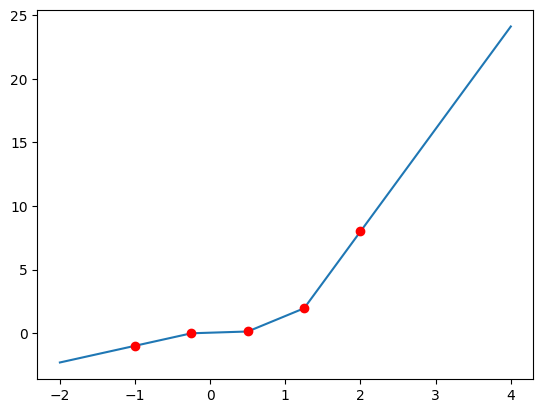

In [ ]:
x_fine = np.linspace(-2, 4, 100)
plt.plot(x_fine, f(x_fine))
plt.plot(x, y, "ro")

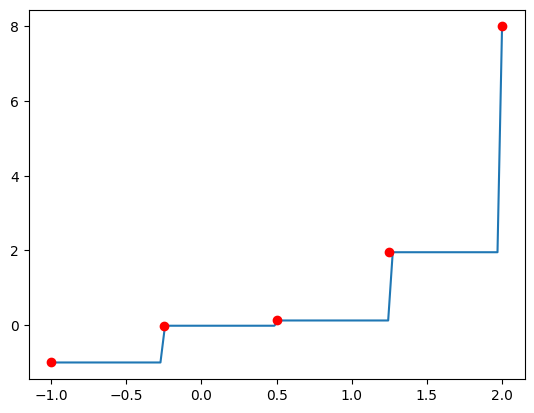

In [ ]:
x_fine = np.linspace(-1, 2, 100)
plt.plot(x_fine,interp.interp1d(x,y,kind="zero")(x_fine)) #stepwise fit
# plt.plot(x_fine,interp.interp1d(x,y,kind="linear")(x_fine)) #best linear fit
# plt.plot(x_fine, interp.interp1d(x, y, kind="cubic")(x_fine))  # best fit curve
plt.plot(x, y, "ro")

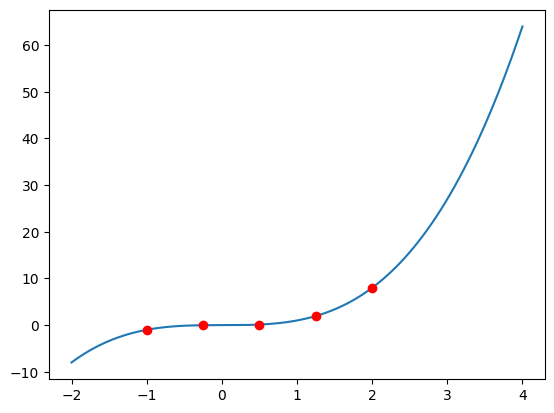

In [ ]:
x_fine_extra = np.linspace(-2, 4, 200)
f = interp.interp1d(x, y, kind="cubic", fill_value="extrapolate")
plt.plot(x_fine_extra, f(x_fine_extra))  # best fit curve
plt.plot(x, y, "ro")

## Optimization : `scipy.optimize`

Contains functions to find minima, roots and fit parameters

### Minimize

In [ ]:
from scipy import optimize

In [ ]:
# Def a function with one arg x
def f(x):
    return x**4 - 10 * x**2

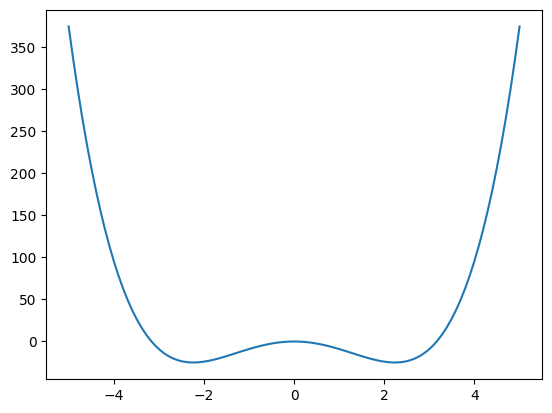

In [ ]:
x = np.linspace(-5, 5, 100)
plt.plot(x, f(x));

In [ ]:
?optimize.minimize

In [ ]:
dir(optimize)

In [ ]:
# find the argmin(function)
results = optimize.minimize(f, 4)  # function and initial guess
results

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -24.99999999999999
        x: [ 2.236e+00]
      nit: 7
      jac: [ 1.431e-06]
 hess_inv: [[ 2.497e-02]]
     nfev: 16
     njev: 8

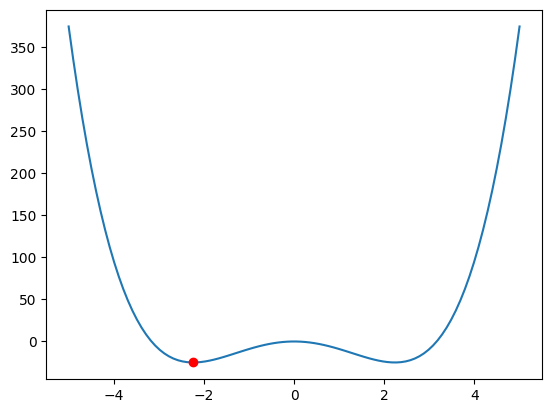

In [ ]:
# let's plot the min points we found
# TODO: What if we change the initial guess??? Try to change -0.5 to 1
plt.plot(x, f(x))
results = optimize.minimize(f, -0.5)
plt.plot(results.x, f(results.x), "ro");

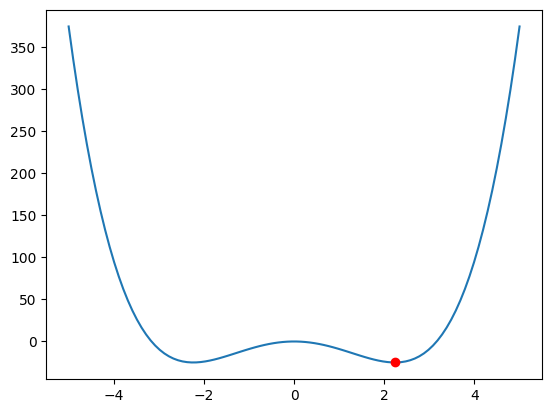

In [ ]:
plt.plot(x, f(x))
results = optimize.minimize(f, 0.5)
plt.plot(results.x, f(results.x), "ro");

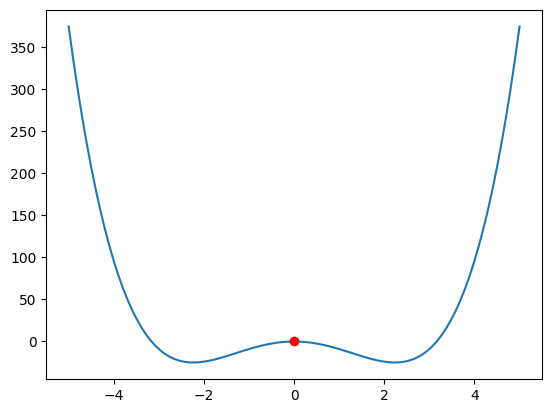

In [ ]:
plt.plot(x, f(x))
results = optimize.minimize(f, 0)
plt.plot(results.x, f(results.x), "ro");

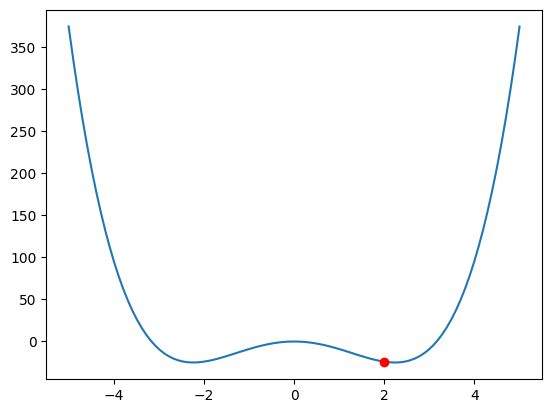

In [ ]:
# What happen if we define the bounds and find the min value
plt.plot(x, f(x))
results = optimize.minimize(f, 0.5, bounds=[(0.1, 2)])
x_opt = results.x
plt.plot(x_opt, f(x_opt), "ro");

In [ ]:
# input can be a int or numpy array data collection as multi-variate equation
# add bounds to define the bounds for each variable element in x
def f(x, const_parameter1, const_parameter2):
    return (
        const_parameter2
        * const_parameter1
        * (x[0] * x[0] + x[1] * x[1] + 5 * (np.sin(2 * x[0]) + np.sin(2 * x[1])))
    )


In [ ]:
f(np.array([5,6]), 10, 25)

np.float64(13899.257463887745)

In [ ]:
results = optimize.minimize(
    fun=f, x0=np.array([-2000, 2000]), args=(13, 44)
)
results

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 17800.05745789146
        x: [ 4.839e+00 -3.534e+00]
      nit: 13
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 2.358e-04  1.136e-05]
            [ 1.136e-05  1.063e-04]]
     nfev: 78
     njev: 26

In [ ]:
results = optimize.minimize(
    fun=f, x0=np.array([0.5, 0]), bounds=[(-20, 40), (-30, 30)], args=(3, 4)
)
results

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: -106.54353918884482
        x: [-7.138e-01 -7.138e-01]
      nit: 6
      jac: [ 1.421e-06 -5.684e-06]
     nfev: 30
     njev: 10
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

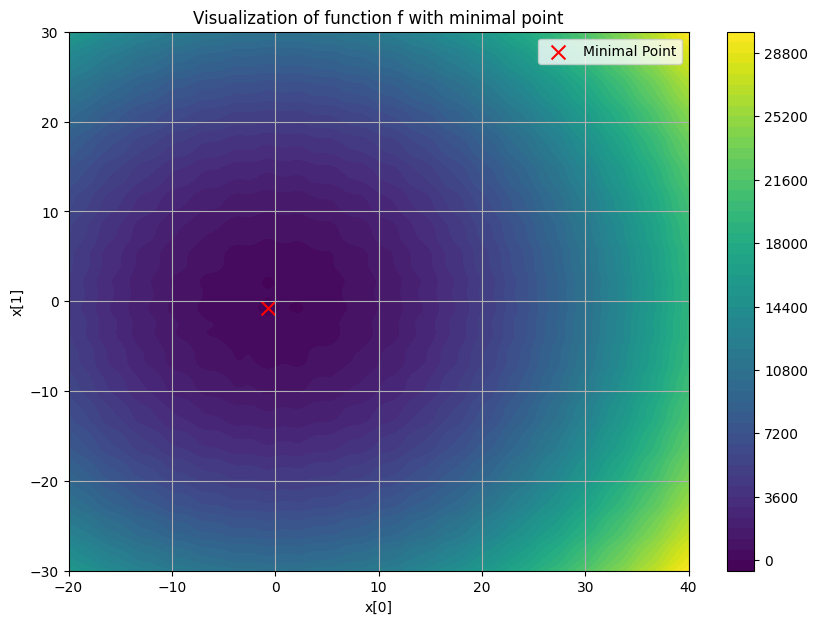

In [ ]:
# What happen if we define the bounds and find the min value
# Generate data for visualization
x = np.linspace(-20, 40, 400)
y = np.linspace(-30, 30, 400)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f([X[i, j], Y[i, j]], 3, 4)

# Plotting
plt.figure(figsize=(10, 7))
contour = plt.contourf(X, Y, Z, 50, cmap="viridis")
plt.colorbar(contour)
plt.scatter(
    results.x[0], results.x[1], color="red", marker="x", s=100, label="Minimal Point"
)
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.title("Visualization of function f with minimal point")
plt.legend()
plt.grid(True)
plt.show()

### Curve Fitting

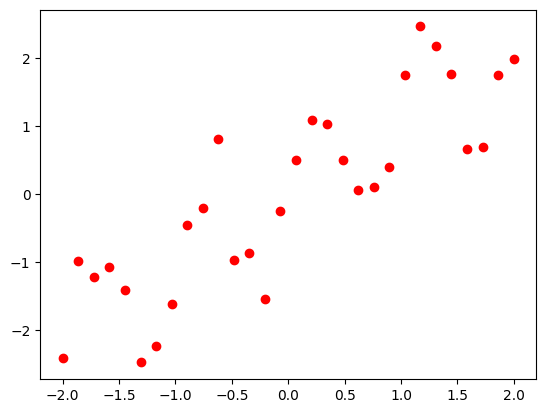

In [ ]:
# wave pattern
x = np.linspace(-2, 2, 30)
y = x + np.sin(6.5 * x) + 0.3 * np.random.randn(30)
plt.plot(x, y, "ro")

In [ ]:
# let's take a guess
def f(x, a, b):
    return a * x + b

In [ ]:
?optimize.curve_fit

In [ ]:
((a, b), _) = optimize.curve_fit(f = f,
                                 xdata = x,
                                 ydata = y,
                                 p0 = (0, 1))#init guess for the parameters
a, b

(np.float64(0.9828143715360411), np.float64(0.0035141340344739813))

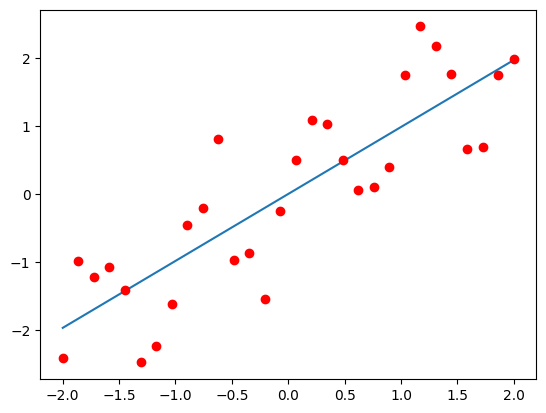

In [ ]:
x_fine = np.linspace(-2, 2, 200)
plt.plot(x_fine, f(x_fine, a, b))
plt.plot(x, y, "ro")

In [ ]:
# Let's use our example data in the begining,
# replacing the parameters into variables,
# and let python figure out
# what is the bes t fitting values for a,b,c?

def g(x, a, b, c, d):
    return a * x + b * np.sin(c * x) + d


# y = a*x +b*np.sin(c*x)

In [ ]:
?optimize.minimize

In [ ]:
# initial guess of a,b,c = 1.5, 0, 7, which may affect the results
((a, b, c, d), _) = optimize.curve_fit(g, x, y, p0 = (1.5, 0, 7, 0))
a, b, c, d

(np.float64(1.0604573728115285),
 np.float64(1.0021366356765855),
 np.float64(6.433926189978713),
 np.float64(0.0035141952716384807))

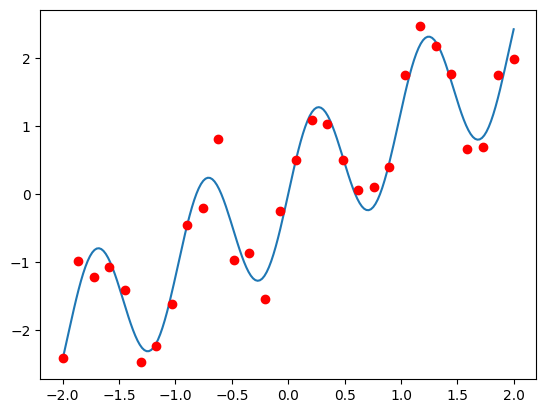

In [ ]:
x_fine = np.linspace(-2, 2, 200)
plt.plot(x_fine, g(x_fine, a, b, c, d))
plt.plot(x, y, "ro")

### Root Finding

In [ ]:
# Apply the optimize.root function to find the root value making f() = 0
def f(x):
    return np.sin(x)

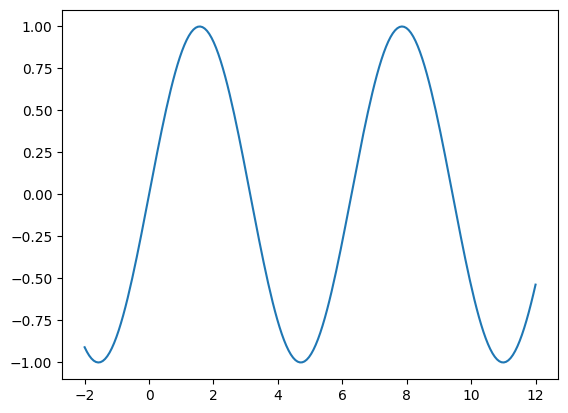

In [ ]:
x_fine = np.linspace(-2, 12, 200)
plt.plot(x_fine, f(x_fine))

In [ ]:
?optimize.root

In [ ]:
r = optimize.root(f, x0 = -2) # x0 is the initial guess
print(r)
print(f'The root is {r.x}.')

 message: The solution converged.
 success: True
  status: 1
     fun: [-1.225e-16]
       x: [-3.142e+00]
  method: hybr
    nfev: 10
    fjac: [[-1.000e+00]]
       r: [ 1.000e+00]
     qtf: [-7.975e-13]
The root is [-3.14159265].


In [ ]:
r.x

array([-3.14159265])

In [ ]:
# verify the result
f(r.x)

array([-1.2246468e-16])

check more about [scipy.optimize](https://docs.scipy.org/doc/scipy/tutorial/optimize.html?highlight=optimization#)

### Linear programming
A very common case is linear programming (LP). These are optimization problems that can be written in the form

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^{T}x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$

Here, we are finding the vector $x$ that minimizes the dot product $c^T x$, where $c$ is some fixed vector, out of all $x$ that satisfy $A_{ub}x \leq b_{ub}$ and $A_{eq}x = b_{eq}$, where $A_{ub}$ and $A_{eq}$ are matrices and $b_{ub}$ and $b_{eq}$ are vectors. (The subscript *ub* just means upper bound constraint and *eq* means equality constraint.)

Figure out how to solve LPs using `scipy.optimize`, and solve the following LP:
$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& 5 x_1 + x_2 \geq 0
\end{split}
\end{equation}
$$

Note that the problem is equivalent to

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^T x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$
where
$$
c = \begin{pmatrix} 1 \\ 2 \end{pmatrix} \qquad
A_{ub} = \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix}, \qquad
b_{ub} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \qquad
A_{eq} = 0, \qquad
b_{eq} = 0.
$$

We can see this because
$$
 \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} \leq \begin{pmatrix} x_1 \\ -5x_1 - x_2 \end{pmatrix}
$$

In [ ]:
?optimize.linprog

In [ ]:
c = np.array([1, 2])
A_ub = np.array([[1, 0], [-5, -1]])
b_ub = np.array([1, 0])

In [ ]:
# #Answer
x1_bounds = (None, None)
x2_bounds = (None, None)
results = optimize.linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=[x1_bounds, x2_bounds])
results

In [ ]:
# rest
c.T @ results.x

In [ ]:
A_ub @ results.x

In [ ]:
A_ub @ results.x <= b_ub

## Statistics : `scipy.stats`

In [ ]:
from scipy import stats

Find the maximum likelihood estimate for parameters

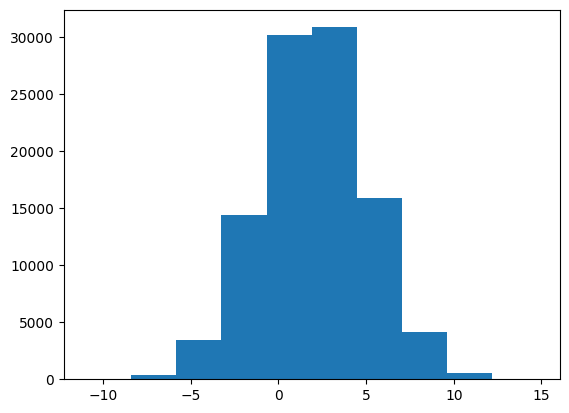

In [ ]:
samples = 3 * np.random.randn(100_000) + 2
plt.hist(samples);

In [ ]:
stats.norm.fit(samples)  # return mean and standard deviation

(np.float64(2.018213949560002), np.float64(2.990347689847206))

In [ ]:
a = np.random.randn(300)
b = np.random.randn(300) # try + 0.5

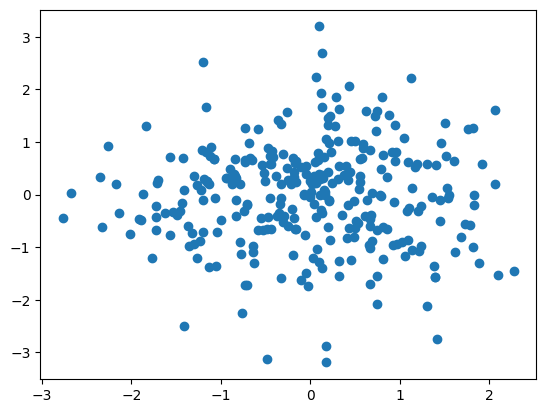

In [ ]:
plt.scatter(a,b)

In [ ]:
?stats.ttest_ind

In [ ]:
# t test for independent distributions to see if they have equal means
# In shorts, assuming they have same mean, how likely our assumption would occur
stats.ttest_ind(a, b)

TtestResult(statistic=np.float64(-0.07920477075313535), pvalue=np.float64(0.9368962467538684), df=np.float64(598.0))

In [ ]:
# Pearson correlation coefficient -> measuring if two data is correclated
?stats.pearsonr

In [ ]:
# if the expected value of a is significantly different from the expected value of b
a = np.random.randn(300)
b = np.random.randn(300) + 1 + 2**a

In [ ]:
stats.pearsonr(a, b)  # r-value and p-value

PearsonRResult(statistic=np.float64(0.611816243459729), pvalue=np.float64(3.4043914609568357e-32))

You can also perform kernel density estimation

In [ ]:
x = np.hstack((2 * np.random.randn(1000) + 5, 0.6 * np.random.randn(1000) - 1))

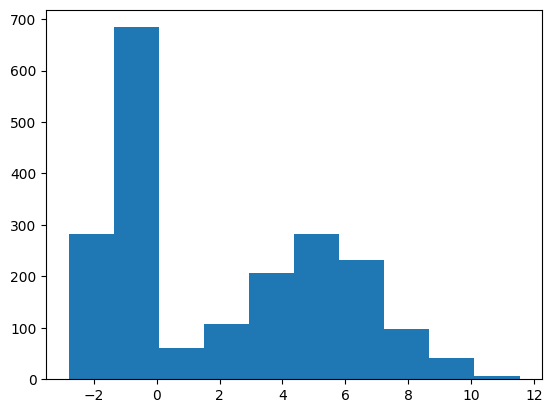

In [ ]:
plt.hist(x);

In [ ]:
pdf = stats.kde.gaussian_kde(x)
# we have two distribution, but we are going to capture features from both

<ipython-input-63-4b1df0ca84f2>:1: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  pdf = stats.kde.gaussian_kde(x)


In [ ]:
pdf(10)

array([0.00857474])

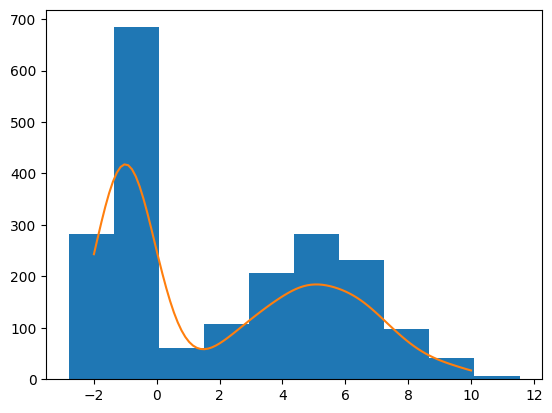

In [ ]:
counts, bins, _ = plt.hist(x)
x_fine = np.linspace(-2, 10, 100)
plt.plot(x_fine, np.sum(counts) * pdf(x_fine))

## Numerical Integration : `scipy.integrate`

In [ ]:
import scipy.integrate as integ

You can compute integral using the `quad` funtion

In [ ]:
def f(x):
    return 2 * x

In [ ]:
integ.quad(f, 0, 2)  # f and lower and upper bounds
# return value up to an error tolerance this much

(4.0, 4.440892098500626e-14)

In [ ]:
?integ.quad

You can also solve an initial value problem for a system of ODEs of the form
$$ \frac{dy}{dt} = f(t,y) $$
$$y(t_0) = y_0$$
Here $t$ is a 1-D indeendent variable (time), $y(t)$ is an N-D vector-valued function (state).

Consider a 2-D function $f(t,y)$ that determines the differential equations:

In [ ]:
def f(t,y):  # dev function
    return (t * y[1], -y[1] - 9 * y[0])

In [ ]:
?integ.solve_ivp

In [ ]:
# y0 = [1,1] Initial condition on y (can be a vector).
# t_span: Interval of integration
# Return: Array containing the value of y for each desired time in t,
#         with the initial value y0 in the first row.
res = integ.solve_ivp(f, t_span=(0,10), y0=[1, 1], t_eval = np.linspace(0, 10, 100))
print(res.t.shape)
print(res.y.shape)

(100,)
(2, 100)


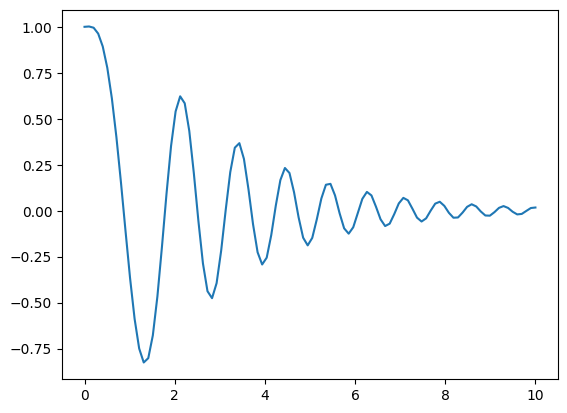

In [ ]:
plt.plot(res.t, res.y[0,:])

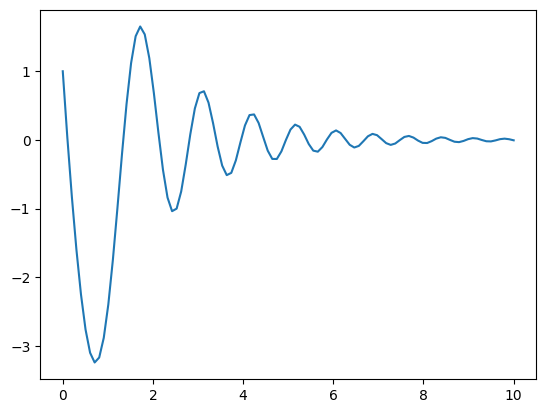

In [ ]:
plt.plot(res.t, res.y[1,:])

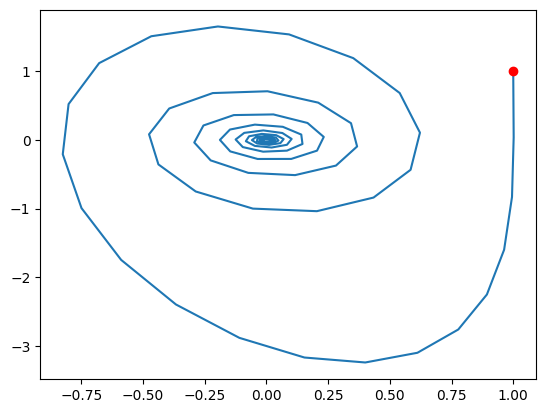

In [ ]:
plt.plot(res.y[0,:], res.y[1,:])
plt.plot(1,1, "ro") # highlight starting point

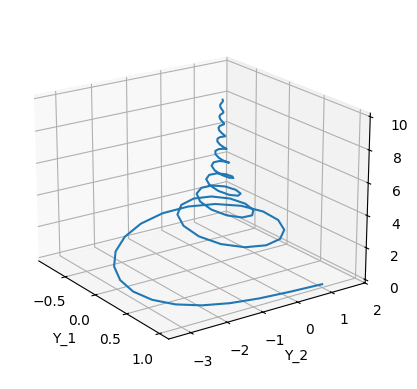

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(res.y[0,:], res.y[1,:], zs=res.t, zdir='z')
ax.set_xlabel('Y_1')
ax.set_ylabel('Y_2')
ax.set_zlabel('Z')
ax.view_init(elev=20., azim=-35, roll=0)

## Physical simulation
Let's simulate a throwing a ball in two dimensions. The ball is described as a function of time by four functions: $x(t), y(t), v_x(t), v_y(t)$, which are governed by the ODE system:

$$
    \frac{dx}{dt} = v_x, \qquad
    \frac{dy}{dt} = v_y, \qquad
    \frac{dv_x}{dt} = 0, \qquad
    \frac{dv_y}{dt} = -g.
$$

We can think of this in vectorized form as:

$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ 0 \\ -g \end{pmatrix}
$$

In [ ]:
def dzdt(t,z):
    x, y, vx, vy = z
    g = 9.8
    return np.array([vx, vy, 0, -g])

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.020e+00 ...  4.898e+01  5.000e+01]
        y: [[ 0.000e+00  1.122e+02 ...  5.388e+03  5.500e+03]
            [ 1.000e+03  1.017e+03 ... -9.678e+03 -1.015e+04]
            [ 1.100e+02  1.100e+02 ...  1.100e+02  1.100e+02]
            [ 2.200e+01  1.200e+01 ... -4.580e+02 -4.680e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 50
     njev: 0
      nlu: 0


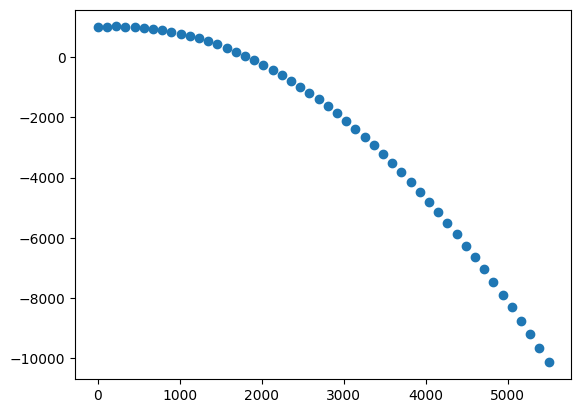

In [ ]:
x, y = 0, 1000
vx, vy = 110, 22

z = np.array([x, y, vx, vy])
t = np.linspace(0, 50, 50)

res = integ.solve_ivp(dzdt, t_span=(0,50), y0 = z, t_eval=np.linspace(0,50, 50))
print(res)
# plot x vs y
plt.scatter(res.y[0,:], res.y[1,:])
plt.show()

### Exercise(Post_lecture)
We can add drag with the following slight modification to the ODE, which adds a force with direction opposing the current velocity, and with magnitude proportional to the velocity squared.
    
$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ -\alpha v_x \sqrt{v_x^2 + v_y^2} \\ -g -\alpha v_y \sqrt{v_x^2 + v_y^2} \end{pmatrix}
$$

Implement this with $\alpha = 0.001$, plot the resulting trajectory, and compare to the dragless case.

In [ ]:
#@title Solution
#Sol
def dzdt(t,z):
  x,y,vx,vy = z
  g = 9.8
  a = 0.001
  return np.array([vx,vy,0-a*vx*np.sqrt(vx*vx+vy*vy), -g-a*vy*np.sqrt(vx*vx+vy*vy)])
x, y = 0, 1000
vx, vy = 110, 22
z=np.array([x,y,vx,vy])

res = integ.solve_ivp(dzdt, t_span=(0,50), y0 = z, t_eval=np.linspace(0,50, 50))

plt.scatter(res.y[0,:], res.y[1,:])
plt.show()

## Other useful packages

### `networkx`
Useful Package to handle graphs.

Install by running `conda install networkx`

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()

In [ ]:
G.add_nodes_from([1, 2, 3, 4])

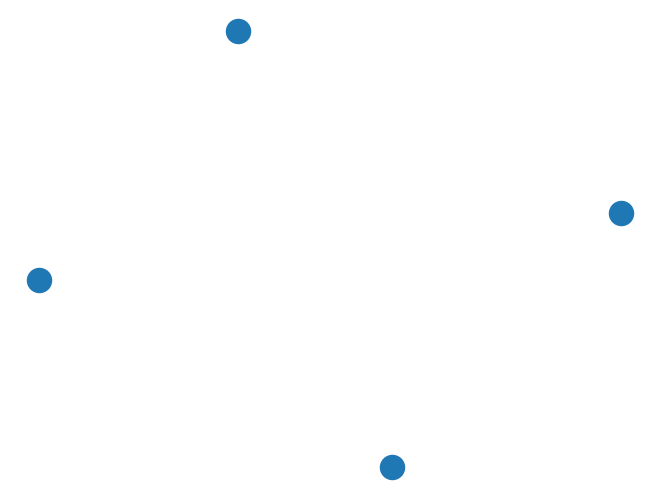

In [ ]:
nx.draw(G)

In [ ]:
G.add_edge(1, 2)

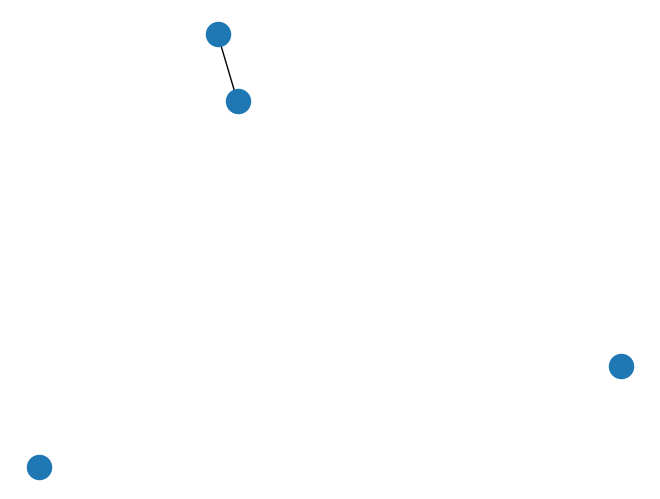

In [ ]:
nx.draw(G)

In [ ]:
G.add_edge(2, 3)
G.add_edge(3, 1)
G.add_edge(3, 4)

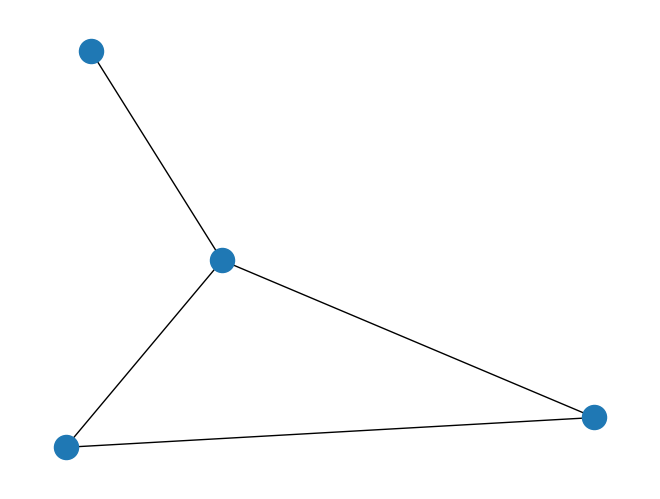

In [ ]:
nx.draw(G)

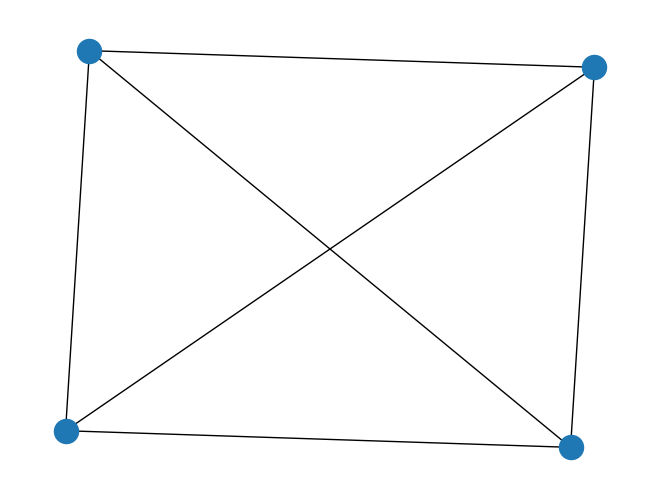

In [ ]:
G = nx.complete_graph(4)
nx.draw(G)

### `sympy`

Package for performing symbolic computation and manipulation.

Install it in your environment by running `conda install sympy`

In [ ]:
from sympy import *

In [ ]:
x, y = symbols(["x", "y"])

In [ ]:
x

x

In [ ]:
expr = x + y**2

In [ ]:
expr

x + y**2

In [ ]:
x * expr

x*(x + y**2)

In [ ]:
expand(x * expr)

x**2 + x*y**2

In [ ]:
factor(x**2 - y**2)

(x - y)*(x + y)

In [ ]:
latex(expr)

'x + y^{2}'

In [ ]:
simplify((x - y) ** 2 + (x + y) ** 2)

2*x**2 + 2*y**2

In [ ]:
x**2 / (y**3 + y)

x**2/(y**3 + y)

In [ ]:
(x**2 / (y**3 + y)).subs(
    y, (x / 2)
).simplify()  # substitue value of y with another parameter

8*x/(x**2 + 4)

In [ ]:
(x**2 / (y**3 + y)).evalf(subs={"x": 2, "y": 4})  # value plug in
# 4/(64+4)

0.0588235294117647

In [ ]:
Integral(
    exp(-(x**2) - y**2), (x, -oo, oo), (y, -oo, oo)
)  # integration, infinity here is - with two o

Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [ ]:
I = Integral(exp(-(x**2) - y**2), (x, -oo, oo), (y, -oo, oo))

In [ ]:
I.doit()  # do the calculation

pi

In [ ]:
(sin(x) / (1 + cos(x)))

sin(x)/(cos(x) + 1)

In [ ]:
(sin(x) / (1 + cos(x))).series(x, 0, 10)  # taylor series center at 0 with 10 terms

x/2 + x**3/24 + x**5/240 + 17*x**7/40320 + 31*x**9/725760 + O(x**10)